Classification + Localization

In [49]:
!pip install transformers


In [50]:
from transformers import pipeline

In [51]:
from transformers.utils import logging
logging.set_verbosity_error()



In [52]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

In [53]:
from PIL import Image

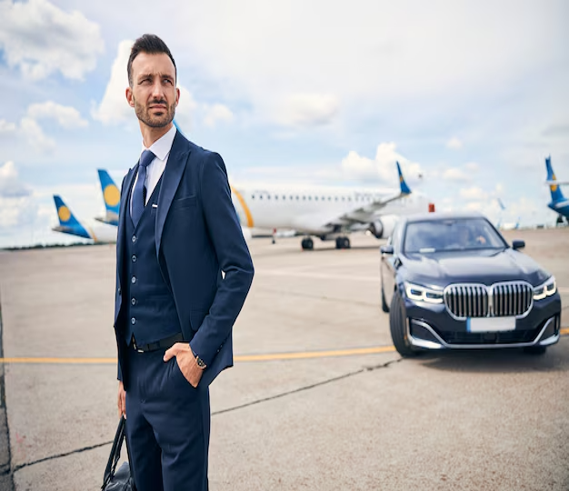

In [54]:
raw_image = Image.open('/content/1(1).png')
resized_image=raw_image.resize((569, 491))
resized_image

In [55]:
pipeline_output = od_pipe(resized_image)

In [56]:
print(pipeline_output)

[{'score': 0.9700541496276855, 'label': 'handbag', 'box': {'xmin': 100, 'ymin': 413, 'xmax': 136, 'ymax': 491}}, {'score': 0.9437592625617981, 'label': 'person', 'box': {'xmin': 467, 'ymin': 227, 'xmax': 487, 'ymax': 244}}, {'score': 0.9682249426841736, 'label': 'airplane', 'box': {'xmin': 544, 'ymin': 155, 'xmax': 569, 'ymax': 224}}, {'score': 0.9391040802001953, 'label': 'airplane', 'box': {'xmin': 50, 'ymin': 168, 'xmax': 142, 'ymax': 242}}, {'score': 0.989556610584259, 'label': 'tie', 'box': {'xmin': 126, 'ymin': 153, 'xmax': 155, 'ymax': 233}}, {'score': 0.9991732239723206, 'label': 'person', 'box': {'xmin': 111, 'ymin': 34, 'xmax': 252, 'ymax': 490}}, {'score': 0.9758172631263733, 'label': 'airplane', 'box': {'xmin': 228, 'ymin': 160, 'xmax': 440, 'ymax': 247}}, {'score': 0.9983310103416443, 'label': 'car', 'box': {'xmin': 378, 'ymin': 215, 'xmax': 565, 'ymax': 358}}]


In [57]:
import matplotlib.pyplot as plt

for obj in pipeline_output:
    print(obj)

plt.show()

{'score': 0.9700541496276855, 'label': 'handbag', 'box': {'xmin': 100, 'ymin': 413, 'xmax': 136, 'ymax': 491}}
{'score': 0.9437592625617981, 'label': 'person', 'box': {'xmin': 467, 'ymin': 227, 'xmax': 487, 'ymax': 244}}
{'score': 0.9682249426841736, 'label': 'airplane', 'box': {'xmin': 544, 'ymin': 155, 'xmax': 569, 'ymax': 224}}
{'score': 0.9391040802001953, 'label': 'airplane', 'box': {'xmin': 50, 'ymin': 168, 'xmax': 142, 'ymax': 242}}
{'score': 0.989556610584259, 'label': 'tie', 'box': {'xmin': 126, 'ymin': 153, 'xmax': 155, 'ymax': 233}}
{'score': 0.9991732239723206, 'label': 'person', 'box': {'xmin': 111, 'ymin': 34, 'xmax': 252, 'ymax': 490}}
{'score': 0.9758172631263733, 'label': 'airplane', 'box': {'xmin': 228, 'ymin': 160, 'xmax': 440, 'ymax': 247}}
{'score': 0.9983310103416443, 'label': 'car', 'box': {'xmin': 378, 'ymin': 215, 'xmax': 565, 'ymax': 358}}


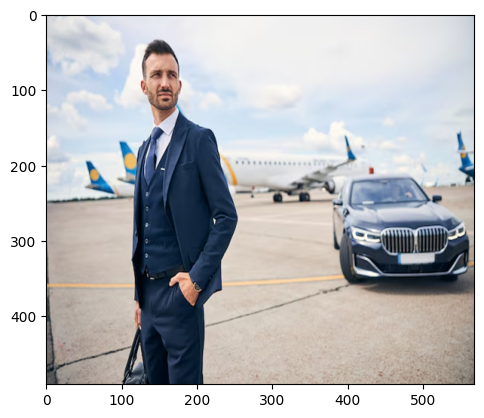

In [58]:
import numpy as np
# showing resized image
plt.imshow(np.array(resized_image))


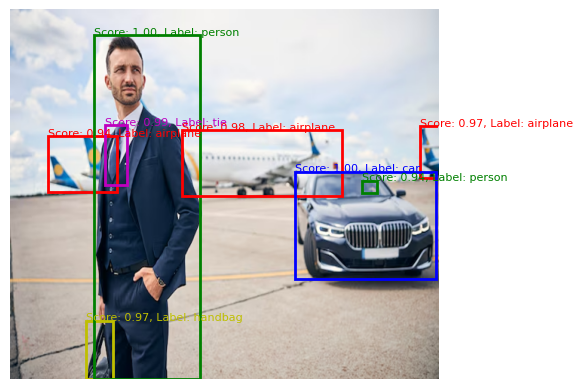

In [59]:
plt.imshow(np.array(resized_image))
plt.axis('off')

# different colors for different labels
label_colors = {
    'person': 'g',  # Green
    'car': 'b',     # Blue
    'airplane': 'r',# Red
    'handbag': 'y', # Yellow
    'tie': 'm'      # Magenta
}

# bounding boxes
for obj in pipeline_output:
    x1, y1, x2, y2 = obj['box']['xmin'], obj['box']['ymin'], obj['box']['xmax'], obj['box']['ymax']
    label = obj['label']
    score = obj['score']

    # color for the labels
    color = label_colors.get(label, 'k')

    # bounding box
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2))

    # text for score and label
    plt.text(x1, y1, f"Score: {score:.2f}, Label: {label}", color=color, fontsize=8)

plt.show()